In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
data_sizes = [10**i for i in range(9)]

#### First, I time Python's List, which is a Linked List implementation and continuously append data of varying size

In [3]:
time_linked_list = []
for data_size in data_sizes:
    t0 = time.time()
    tmp_list = []
    for i in range(data_size):
        tmp_list.append(i)
    t1 = time.time()
    duration = t1-t0
    time_linked_list.append(duration)

#### Second, I time NumPy array, which is an Array implementation, and do the same with np.append()

In [4]:
time_array = []
for data_size in data_sizes:
    t0 = time.time()
    tmp_array = np.array([])
    for i in range(data_size):
        np.append(tmp_array, i)
    t1 = time.time()
    duration = t1-t0
    time_array.append(duration)

#### Lastly, instead of appending, I create a fixed sized array where size of the array = size of the data to be appended. Thus, instead of appending, I initialize the array with zeros and change them with values as I proceed

In [5]:
time_array_init_with_zeros = []
for data_size in data_sizes:
    t0 = time.time()
    tmp_array = np.zeros(data_size)
    for i in range(data_size):
        tmp_array[i] = i
    t1 = time.time()
    duration = t1-t0
    time_array_init_with_zeros.append(duration)

#### The results

(0.0, 10.0)

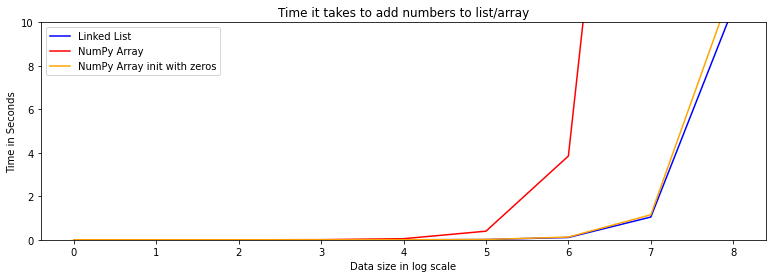

In [6]:
fig, ax = plt.subplots(figsize = (13, 4))
ax.plot(time_linked_list, color = 'blue')
ax.plot(time_array, color = 'red')
ax.plot(time_array_init_with_zeros, color = 'orange')
ax.set_xlabel('Data size in log scale')
ax.set_ylabel('Time in Seconds')
ax.legend(['Linked List', 'NumPy Array', 'NumPy Array init with zeros'])
ax.set_title('Time it takes to add numbers to list/array'),
ax.set_ylim(0, 10)

- Using NumPy array with np.append() function is the worst when continuously appending data to it, because as the initially allocated array is filled, another allocation is carried out in RAM and all the previous data is moved there, so it creates a huge overhead as data grows
- Thus, it is better to use Linked List when size of whole data is unknown at the beginning of the process, then convert it to NumPy array for later use.
- Using a NumPy array with fixed size, which is enough to contain the whole data, results in similar result with using Linked List.